# CNN aplicado a clasificar imágenes 
***
Ejemplo basado en ejemplo de: https://keras.io/examples/vision/mnist_convnet/

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Fashion MNIST datasetdataset
****

- Problema de clasificación de imágenes
- 10 clases: 0, 1, 2, ..., 9
- https://keras.io/api/datasets/fashion_mnist/

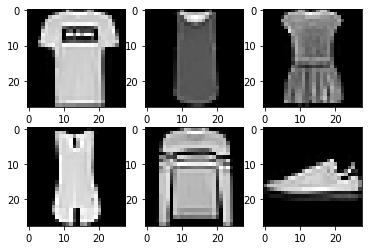

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(x_train[i], cmap="gray")
    


In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", 
                      kernel_initializer=keras.initializers.random_normal),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022-11-09 10:20:19.771982: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 23s 51ms/step - loss: 1.7389 - accuracy: 0.3918 - val_loss: 0.9358 - val_accuracy: 0.6970
Epoch 2/15
422/422 [==============================] - 23s 54ms/step - loss: 0.9347 - accuracy: 0.6567 - val_loss: 0.7282 - val_accuracy: 0.7238
Epoch 3/15
422/422 [==============================] - 16s 39ms/step - loss: 0.7739 - accuracy: 0.7181 - val_loss: 0.6416 - val_accuracy: 0.7638
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.6979 - accuracy: 0.7459 - val_loss: 0.5952 - val_accuracy: 0.7840
Epoch 5/15
422/422 [==============================] - 16s 39ms/step - loss: 0.6477 - accuracy: 0.7633 - val_loss: 0.5541 - val_accuracy: 0.7957
Epoch 6/15
422/422 [==============================] - 16s 38ms/step - loss: 0.6175 - accuracy: 0.7749 - val_loss: 0.5339 - val_accuracy: 0.8033
Epoch 7/15
422/422 [==============================] - 17s 40ms/step - loss: 0.5851 - accuracy: 0.7866 - val_loss: 0.5132 - val_accuracy:

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.46170058846473694
Test accuracy: 0.8364999890327454


In [8]:
prediction = model.predict(x_test)
print("La predicción para cada imagen es un vector con 10 componentes")
print(prediction[0])

La predicción para cada imagen es un vector con 10 componentes
[1.8041545e-05 3.2482881e-06 4.1518924e-05 4.6650901e-05 2.6803056e-05
 7.2007410e-02 2.5948773e-05 2.0817791e-01 4.5279162e-03 7.1512455e-01]


In [9]:
prediction

array([[1.80415445e-05, 3.24828807e-06, 4.15189243e-05, ...,
        2.08177909e-01, 4.52791620e-03, 7.15124547e-01],
       [1.46583300e-02, 2.67839528e-06, 9.05230582e-01, ...,
        1.35905098e-09, 2.68673524e-04, 2.77545320e-09],
       [4.97605761e-08, 9.99999166e-01, 1.62833613e-09, ...,
        3.18206267e-10, 1.08907265e-07, 1.25028651e-11],
       ...,
       [3.75548899e-02, 5.88564071e-05, 1.96007011e-03, ...,
        2.35743428e-05, 9.14933920e-01, 1.82017232e-06],
       [2.57471356e-06, 9.98284519e-01, 6.28753511e-08, ...,
        5.75185936e-07, 1.45271133e-06, 2.75228643e-07],
       [1.27250911e-03, 1.71585460e-04, 3.11459298e-03, ...,
        3.07142317e-01, 4.50405590e-02, 5.68520045e-03]], dtype=float32)

In [10]:
prediction

array([[1.80415445e-05, 3.24828807e-06, 4.15189243e-05, ...,
        2.08177909e-01, 4.52791620e-03, 7.15124547e-01],
       [1.46583300e-02, 2.67839528e-06, 9.05230582e-01, ...,
        1.35905098e-09, 2.68673524e-04, 2.77545320e-09],
       [4.97605761e-08, 9.99999166e-01, 1.62833613e-09, ...,
        3.18206267e-10, 1.08907265e-07, 1.25028651e-11],
       ...,
       [3.75548899e-02, 5.88564071e-05, 1.96007011e-03, ...,
        2.35743428e-05, 9.14933920e-01, 1.82017232e-06],
       [2.57471356e-06, 9.98284519e-01, 6.28753511e-08, ...,
        5.75185936e-07, 1.45271133e-06, 2.75228643e-07],
       [1.27250911e-03, 1.71585460e-04, 3.11459298e-03, ...,
        3.07142317e-01, 4.50405590e-02, 5.68520045e-03]], dtype=float32)

In [11]:
labels = {0: "T-shirt/top", 1: "trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt",
         7: "Sneaker", 8:"Bag", 9: "Ankle boot"}

In [12]:
d = classification_report(y_test.argmax(axis=1), prediction.argmax(axis=1),  target_names=labels.values())

print(d)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.78      0.79      1000
     trouser       0.99      0.96      0.97      1000
    Pullover       0.73      0.74      0.74      1000
       Dress       0.82      0.88      0.85      1000
        Coat       0.68      0.75      0.72      1000
      Sandal       0.93      0.94      0.94      1000
       Shirt       0.60      0.51      0.55      1000
     Sneaker       0.91      0.92      0.92      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000



### Analicemos las primeras imágenes del conjunto de testing

image  1 predicts  Ankle boot
image  2 predicts  Pullover
image  3 predicts  trouser
image  4 predicts  trouser
image  5 predicts  Shirt
image  6 predicts  trouser


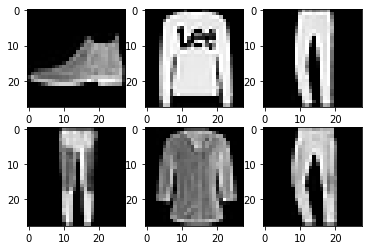

In [13]:
for i in range(1, 7):
    index_max = np.argmax(prediction[i-1,:])
    print("image ", i, "predicts ", labels[index_max])
    plt.subplot(2, 3, i)
    plt.imshow(x_test[i-1,:,:,0], cmap="gray")